# Implement Linear Regression From Scratch
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Machine Learning Course

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Problem 
Implement Linear Regression with *Mean Absolute Error* as the cost function from scratch. Compare your results with the Linear Regression module of *Scikit-Learn*.

### Gradient descent to solve linear regression with mean absolute error (MAE) loss function
Mean Absolute Error cost function for a linear regression model :
$$MAE(w,b) = \frac{1}{m} \sum\limits_{i = 0}^{m-1} |f_{w,b}(x^{(i)}) - y^{(i)}|\tag{1}$$ 

where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

We will implement Linear Regression model using gradient descent from scratch. *Gradient Descent* was described as

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, parameters $w$, $b$ are updated simultaneously.

The gradient is defined as:
$$
\begin{align}
\frac{\partial MAE(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} sgn(f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
\frac{\partial MAE(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} sgn(f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

where
$$
\begin{align}
sgn(x) &= \frac{x}{|x|} \tag{6}
\end{align}
$$
Here simultaniously means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [3]:
from sklearn.metrics import accuracy_score

class myLinearRegression():

    """
        Linear Regression model with mean absolute error as cost function

        Parameters
        ----------

        learning_rate : float
                        learning rate of gradient descent algorithm
        n_iter : int
                number of iterations or epoch of gradient descent algorithm
        
        Attributes
        ----------
        lr : float
             learning rate of gradient descent algorithm
        n_iter : int
                 number of iterations or epoch of gradient descent algorithm
        weights : numpy.array
                  weights of our model are initialized with random numbers in [0,1]  
        bias : float
               bias of our model which is initialized with 0

        Methods
        -------
        fit(X,y)
            training the weights with regards to dataset (X and y)
        predict(X)
                predict target values corresponding to X
        _compute_gradient(X,y_true,y_predicted)
                          computing gradients of mae cost function

    """

    def __init__(self,learning_rate = 0.01,n_iter=10000):
        self.lr = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    # computing gradients of mae cost function
    def _compute_gradient(self,X,y_true,y_predicted):
        n = X.shape[0]
        dw = (1 / n) * np.dot(np.sign(y_predicted - y_true).T, X)
        db = (1 / n) * np.sum(np.sign(y_predicted - y_true))
        return dw , db

    def predict(self,X):
        return np.dot(X,self.weights) + self.bias

    def fit(self,X,y):
        # initializing weights and bias
        self.weights = np.random.rand(X.shape[1])
        self.bias = 0 

        for _ in range(self.n_iter):
            y_predicted = self.predict(X)
            dw , db = self._compute_gradient(X,y,y_predicted)
            
            # updating weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def score(self, X, y, sample_weight=None):
        return accuracy_score(y, self.predict(X), sample_weight=sample_weight)

We will preform our implemented linear regression model on a simple dataset.

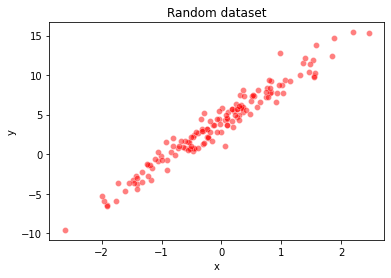

In [4]:
#generating random dataset
np.random.seed(42)
x = np.random.randn(150, 1)
y = 4 + 5 * x + np.random.randn(150, 1)

#plotting
sns.scatterplot(x=x.squeeze(), y=y.squeeze(), color='red', alpha=0.5)
plt.title('Random dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
linear_regression = myLinearRegression()
y = y.squeeze()
linear_regression.fit(x,y)

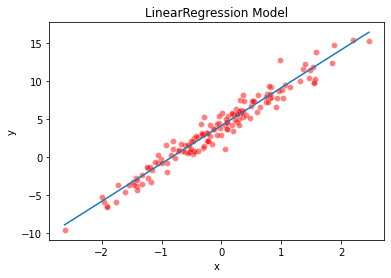

In [6]:
x_range = np.linspace(x.min(), x.max(), num=400)
predicted_y1 = linear_regression.predict(x_range.reshape(400, 1))

sns.scatterplot(x=x.squeeze(), y=y.squeeze(), color='red', alpha=0.5)
plt.plot(x_range, predicted_y1)
plt.title('LinearRegression Model')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Linear Regression Using Scikit-Learn

In [7]:
from sklearn.linear_model import LinearRegression

Linear_Regression = LinearRegression()
Linear_Regression.fit(x, y)

LinearRegression()

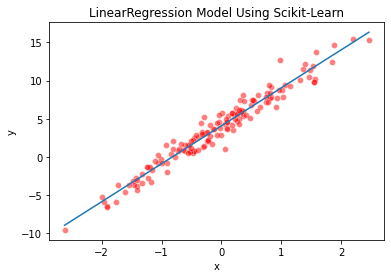

In [8]:
x_range = np.linspace(x.min(), x.max(), num=400)
predicted_y2 = Linear_Regression.predict(x_range.reshape(400, 1))

sns.scatterplot(x=x.squeeze(), y=y.squeeze(), color='red', alpha=0.5)
plt.plot(x_range, predicted_y2)
plt.title("LinearRegression Model Using Scikit-Learn")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Show Two Model in the same plot

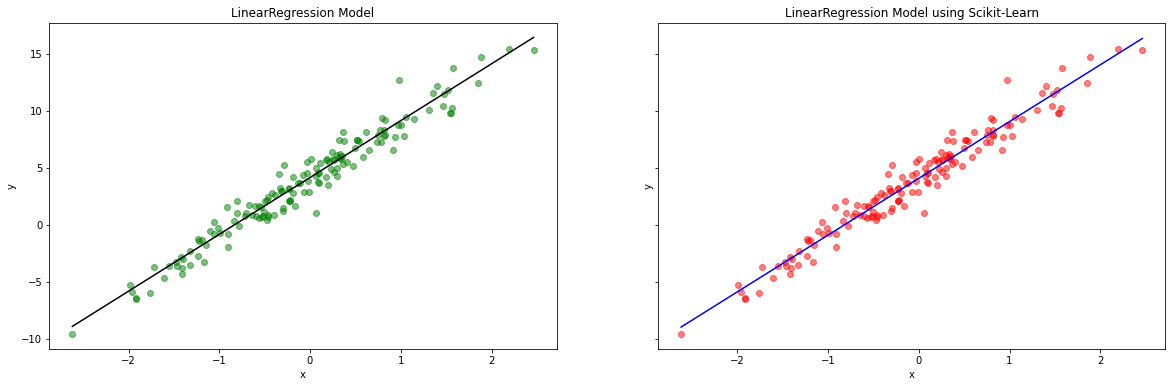

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6), sharex=True, sharey=True)

ax[0].scatter(x=x.squeeze(), y=y.squeeze(), color='green', alpha=0.5)
ax[0].plot(x_range, predicted_y1, c='black')
ax[0].set_title("LinearRegression Model")
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].scatter(x=x.squeeze(), y=y.squeeze(), color='red', alpha=0.5)
ax[1].plot(x_range, predicted_y2, c='blue')
ax[1].set_title("LinearRegression Model using Scikit-Learn")
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
plt.show()

We can also compute the mean absolute error:

In [10]:
from sklearn.metrics import mean_absolute_error

y_predicted1 = linear_regression.predict(x)
y_predicted2 = Linear_Regression.predict(x)
model_error1 = mean_absolute_error(y, y_predicted1)
model_error2 = mean_absolute_error(y, y_predicted2)
print(f"The mean absolute error of the my model is {model_error1:.5f}")
print(f"The mean absolute error of the optimal model is {model_error2:.5f}")

The mean absolute error of the my model is 0.79907
The mean absolute error of the optimal model is 0.80038


### Run Linear Regression On Tesla_stock_price_prediction Dataset

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

linear_regression = make_pipeline(StandardScaler(), myLinearRegression(n_iter=40000))
Linear_Regression = make_pipeline(StandardScaler(), LinearRegression())

In [12]:
dataUrl = 'Datasets/TSLA.csv'
tesla = pd.read_csv(dataUrl)
tesla.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
7,2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
8,2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500
9,2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100


In [13]:
tesla.drop(['Date'], axis=1, inplace=True)
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [14]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2416 non-null   float64
 1   High       2416 non-null   float64
 2   Low        2416 non-null   float64
 3   Close      2416 non-null   float64
 4   Adj Close  2416 non-null   float64
 5   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 113.4 KB


### Predict Closing Price With Linear Regression

In [15]:
y = tesla['Close'].values
X = tesla['High'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [16]:
linear_regression.fit(x_train, y_train)
Linear_Regression.fit(x_train, y_train)
y_predicted1 = linear_regression.predict(x_test)
y_predicted2 = Linear_Regression.predict(x_test)
model_error1 = mean_absolute_error(y_test, y_predicted1)
model_error2 = mean_absolute_error(y_test, y_predicted2)
#accuracy_score1 = linear_regression.score(x_test, y_test)
accuracy_score2 = Linear_Regression.score(x_test, y_test)

print(f"The mean absolute error of the my model is {model_error1:.5f}")
print(f"The mean absolute error of the optimal model is {model_error2:.5f}")
print()
print(f"The accuracy score of the optimal model is {accuracy_score2:.5f}")

The mean absolute error of the my model is 2.00568
The mean absolute error of the optimal model is 2.10912

The accuracy score of the optimal model is 0.99925


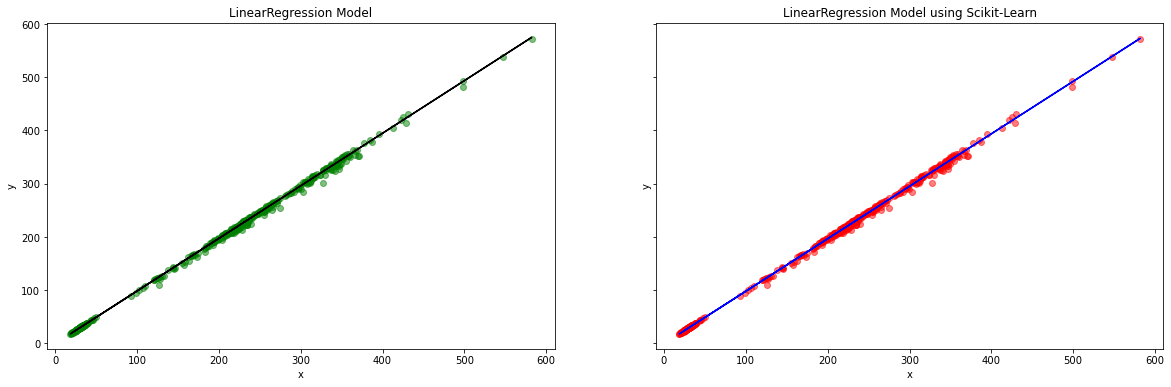

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6), sharex=True, sharey=True)

ax[0].scatter(x_test, y_test, color='green', alpha=0.5)
ax[0].plot(x_test, y_predicted1, c='black')
ax[0].set_title("LinearRegression Model")
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].scatter(x_test, y_test, color='red', alpha=0.5)
ax[1].plot(x_test, y_predicted2, c='blue')
ax[1].set_title("LinearRegression Model using Scikit-Learn")
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
plt.show()

## Conclusion for this problem
A linear regression model minimizes the mean absolute error on the training set. This means that the parameters obtained after the fit (i.e. coef_ and intercept_) are the optimal parameters that minimizes the mean absolute error. In other words, any other choice of parameters will yield a model with a higher mean absolute error on the training set.